 # Project objective: 

The goal of this project is to build a model that can predict the probability of heart disease occurrence, based on a combination of features that describes the disease. In order to achieve the goal, we used data sets that was collected by Cleveland Clinic Foundation in Switzerland.
The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. We have 303 rows of people data with 13 continuous observation of different symptoms.
We have developed two algorithms using linear regression and decision trees, on Cleveland dataset

Dataset Description:
The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1, 2, 3, 4) from absence (value 0). We have 303 rows of people data with 13 continuous observation of different symptoms.

Detailed Description of Dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

# 1. Import Libraries:

In [2]:
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from sklearn.linear_model import SGDClassifier

from IPython.display import Image


# 2. Defining the column names and reading the file:

In [3]:
col_names = ['age','gender','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv(r'C:\Users\User\Desktop\dem\original_datasets\processed.cleveland.data.csv', names=col_names, header=None, na_values="?")


# 3. Defining a function for displaying the decision tree:

In [4]:
def visualize_tree(tr, feature_names):
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(tr, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]

 ### Display first 5 lines

In [5]:
df.head()

,age,gender,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Display the information about the data in the dataframe loaded

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
gender                  303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


### Describe:
Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [7]:
df.describe()

,age,gender,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# 3. Analysis and Visualization:
### Differentiate the categorical and numerical columns

In [8]:
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['gender', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


### Count the number of labels with their corresponding diagnosis

In [9]:
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

### Differentiate the data based on the severity of diagnosis:
                                                           if 0 then no heart disease
                                                           else diagonised with heart disease

In [64]:
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

### Display a bar chart and a pie chart indicating the count corresponding to the diagnosis

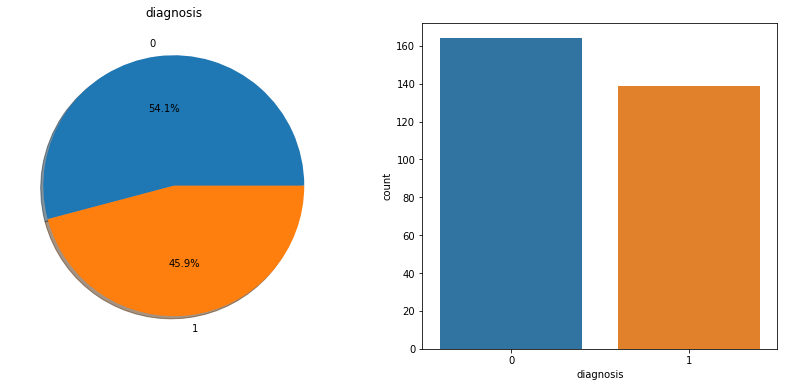

In [11]:
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

### Describe all the numeric columns in the dataframe

In [12]:
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


### Plot pairwise relationships in the dataset 

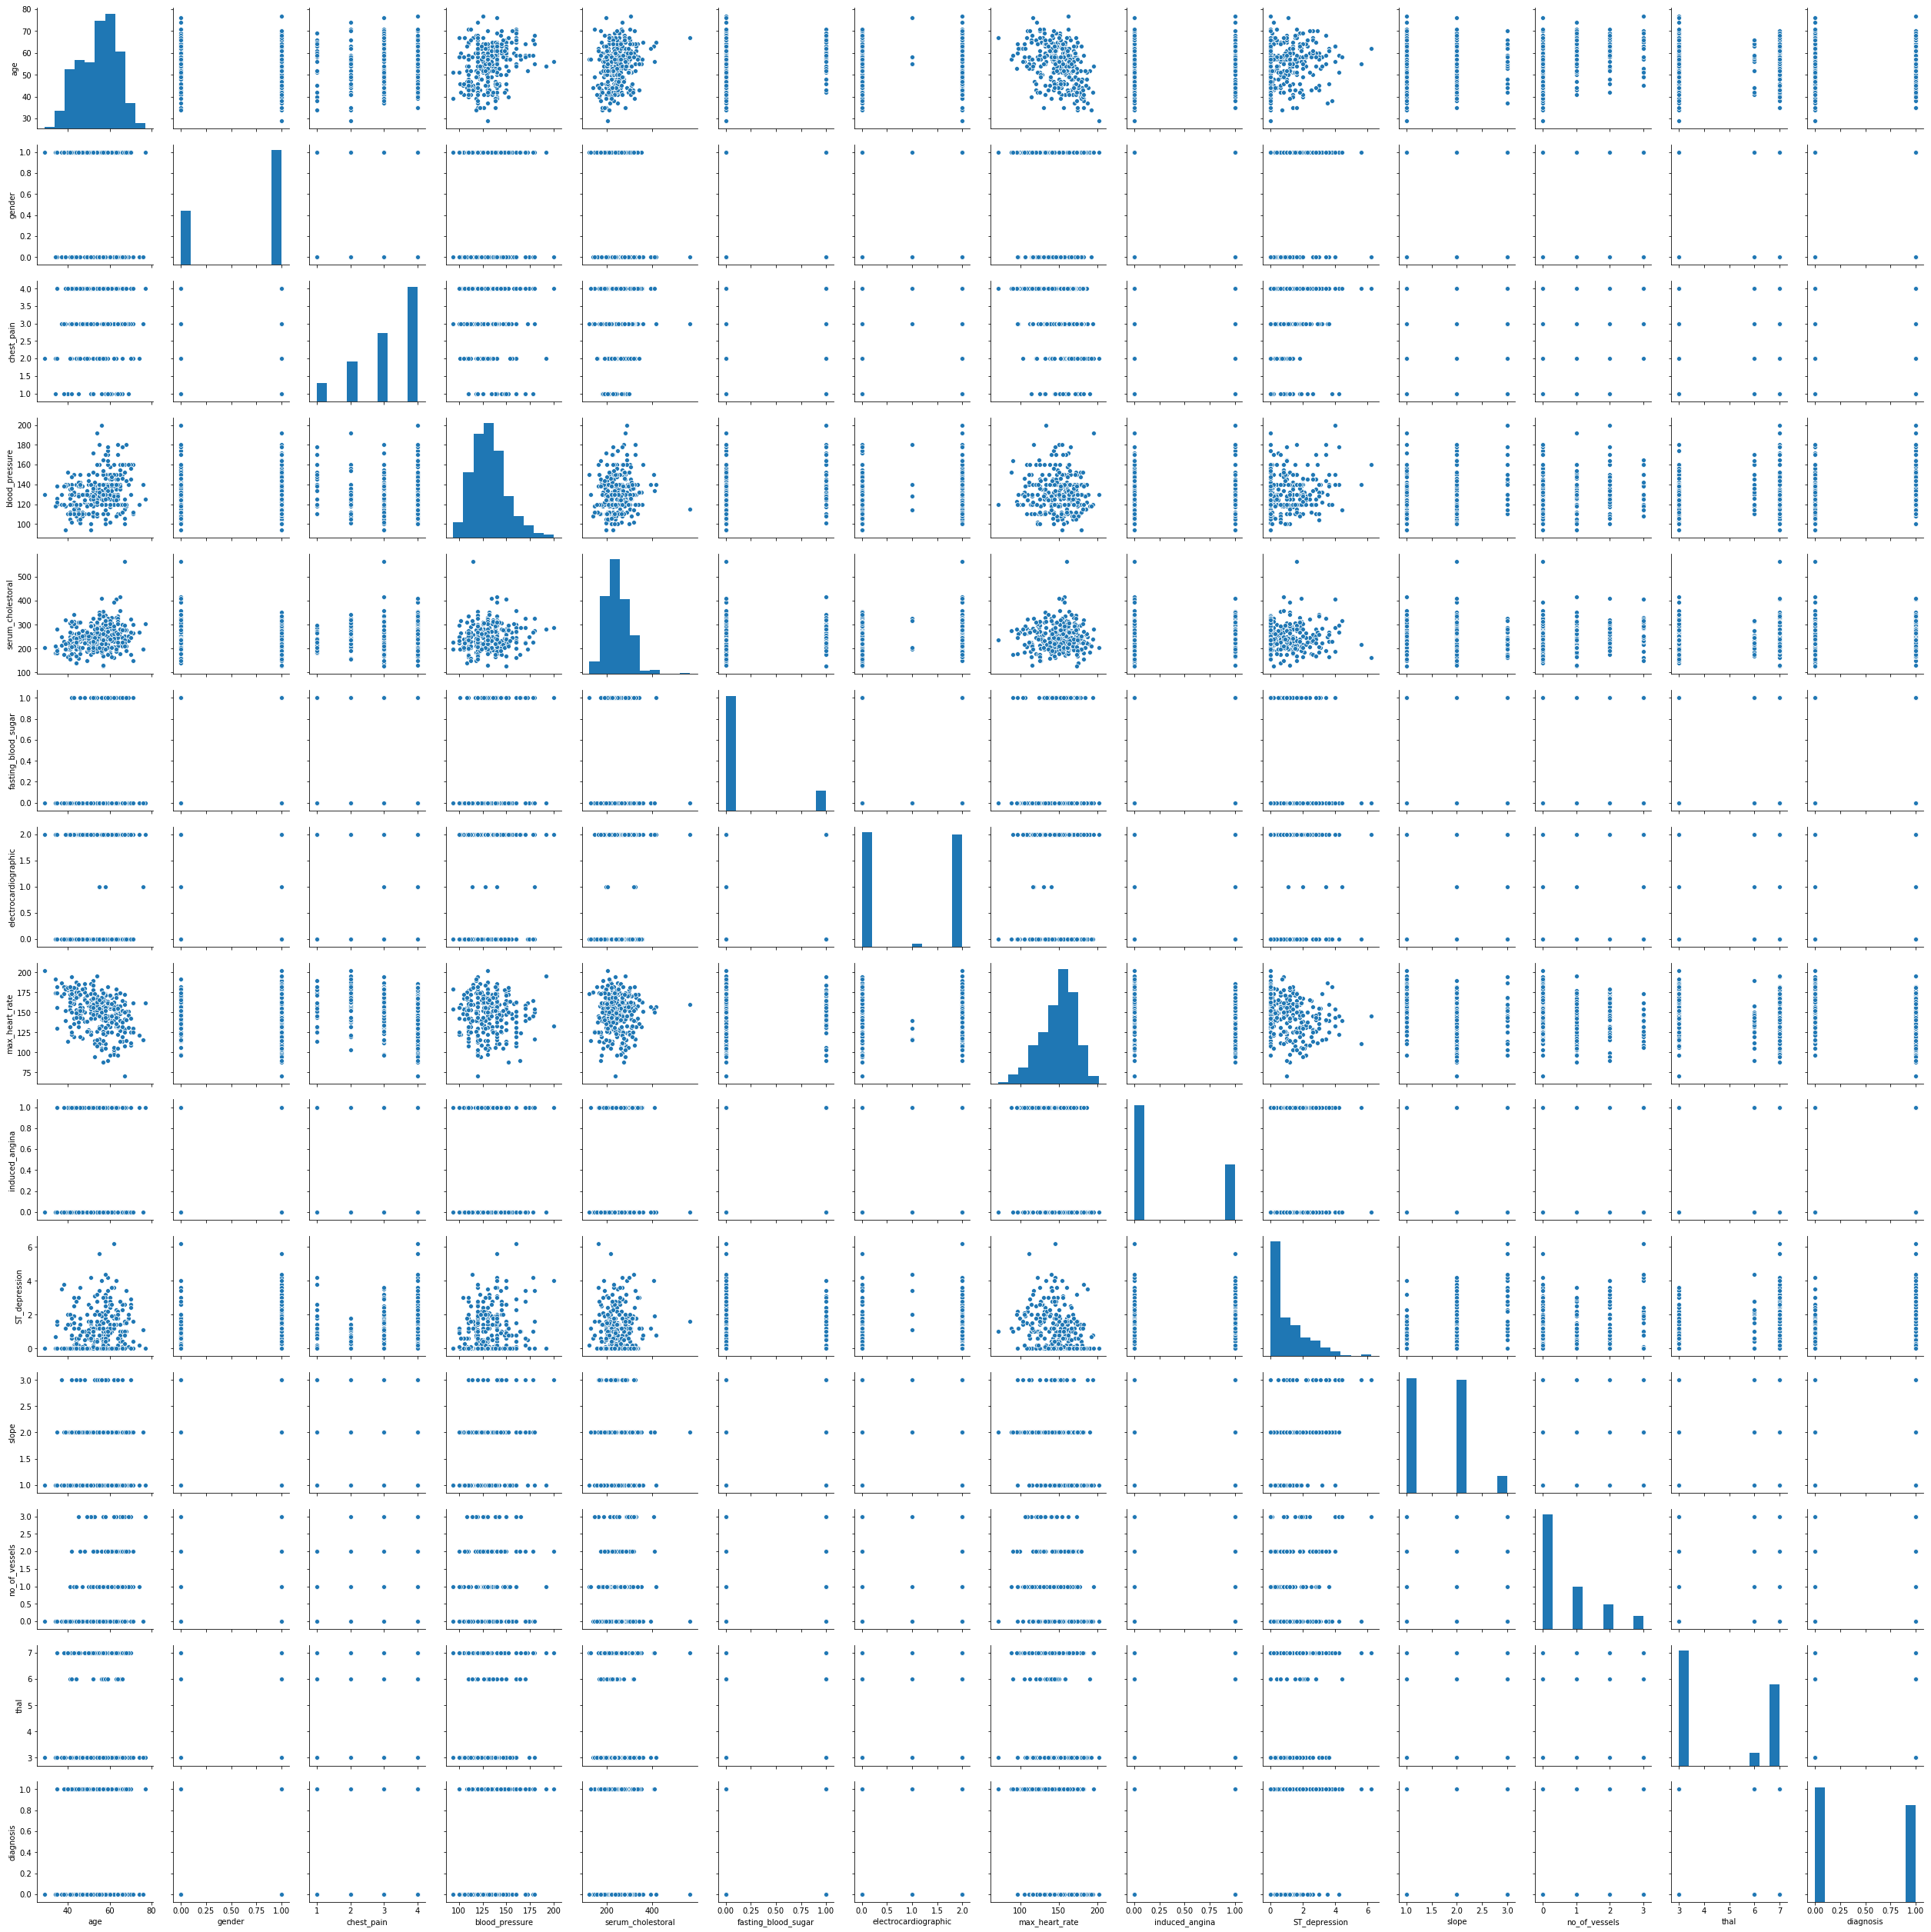

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)
plt.show()

### Plot pairwise relationships between the numeric columns of the dataset

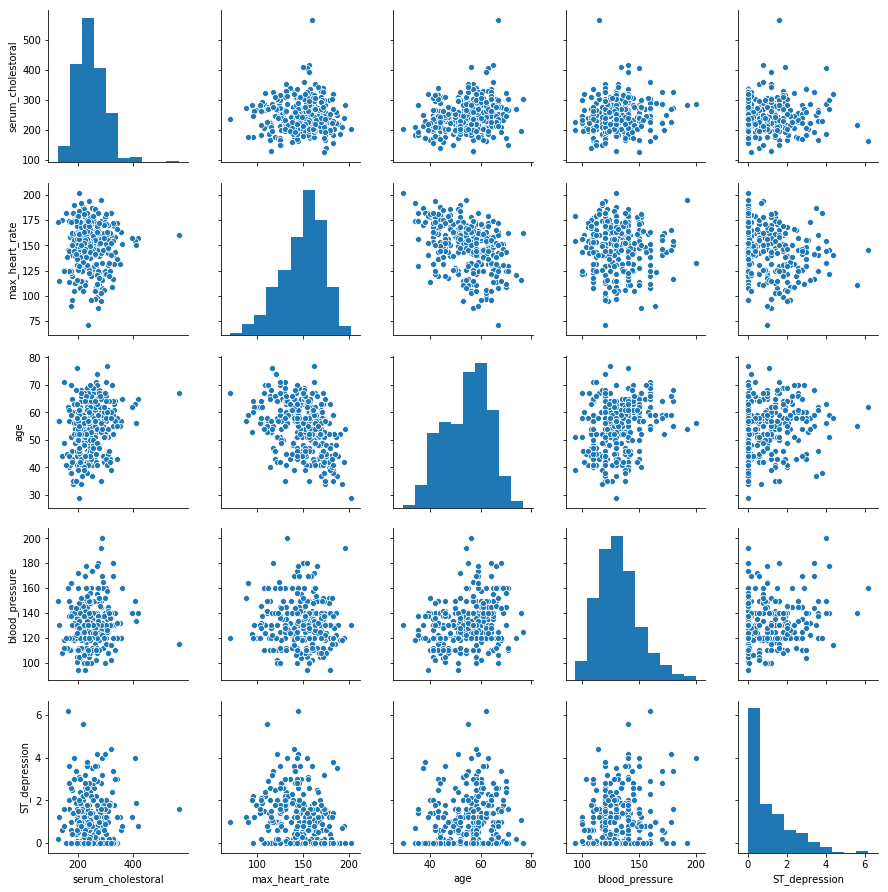

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df[numeric_columns])
plt.show()

### Generate the heatmap to understand the dataset

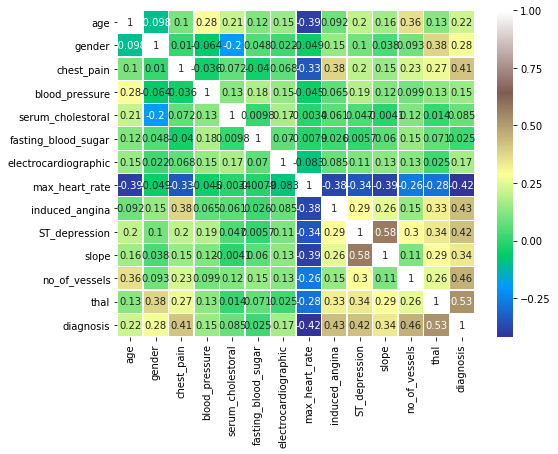

In [15]:
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

#### Group all other columns in the dataset with respect to diagnosis

In [16]:
print ("Minimum age to Maximum age per disease type")

df.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  df.groupby(["diagnosis", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


diagnosis
0    29.0, 76.0
1    35.0, 77.0
Name: age, dtype: object

In [17]:
print ("Mean age per disease type")
df.groupby(["diagnosis", ])["age"].mean()

Mean age per disease type


diagnosis
0    52.585366
1    56.625899
Name: age, dtype: float64

In [18]:
print ("Count each gender per heart disease ")
df.groupby(["diagnosis", "gender"])["age"].count()

Count each gender per heart disease 


diagnosis  gender
0          0.0        72
           1.0        92
1          0.0        25
           1.0       114
Name: age, dtype: int64

In [19]:
print ("Count each chest pain value per heart disease type")
df.groupby(["diagnosis", "chest_pain"])["age"].count()

Count each chest pain value per heart disease type


diagnosis  chest_pain
0          1.0            16
           2.0            41
           3.0            68
           4.0            39
1          1.0             7
           2.0             9
           3.0            18
           4.0           105
Name: age, dtype: int64

In [20]:
print ("Minimum blood pressure to Maximum  blood pressure per disease type")

df.groupby(["diagnosis"])["blood_pressure"].min().astype(str) + ', ' + df.groupby(["diagnosis"])["blood_pressure"].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


diagnosis
0     94.0, 180.0
1    100.0, 200.0
Name: blood_pressure, dtype: object

In [21]:
print ("Mean blood pressure per disease type")
df.groupby(["diagnosis", ])["blood_pressure"].mean()

Mean blood pressure per disease type


diagnosis
0    129.250000
1    134.568345
Name: blood_pressure, dtype: float64

In [22]:
print ("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")

df.groupby(["diagnosis"])["serum_cholestoral"].min().astype(str) + ', ' +  df.groupby(["diagnosis"])["serum_cholestoral"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


diagnosis
0    126.0, 564.0
1    131.0, 409.0
Name: serum_cholestoral, dtype: object

In [23]:
print ("Mean serum_cholestoral per disease type")
df.groupby(["diagnosis", ])["serum_cholestoral"].mean()

Mean serum_cholestoral per disease type


diagnosis
0    242.640244
1    251.474820
Name: serum_cholestoral, dtype: float64

In [24]:
print ("Count each fasting_blood_sugar per heart disease type")
df.groupby(["diagnosis", "fasting_blood_sugar"])["age"].count()

Count each fasting_blood_sugar per heart disease type


diagnosis  fasting_blood_sugar
0          0.0                    141
           1.0                     23
1          0.0                    117
           1.0                     22
Name: age, dtype: int64

In [25]:
print ("Count each electrocardiographic per heart disease type")
df.groupby(["diagnosis", "electrocardiographic"])["age"].count()

Count each electrocardiographic per heart disease type


diagnosis  electrocardiographic
0          0.0                     95
           1.0                      1
           2.0                     68
1          0.0                     56
           1.0                      3
           2.0                     80
Name: age, dtype: int64

In [26]:
print ("Minimum max_heart_rate to Maximum max_heart_rate per disease type")

df.groupby(["diagnosis"])["max_heart_rate"].min().astype(str) + ', ' +  df.groupby(["diagnosis"])["max_heart_rate"].max().astype(str)

Minimum max_heart_rate to Maximum max_heart_rate per disease type


diagnosis
0    96.0, 202.0
1    71.0, 195.0
Name: max_heart_rate, dtype: object

In [27]:
print ("Mean max_heart_rate per disease type")
df.groupby(["diagnosis", ])["max_heart_rate"].mean()

Mean max_heart_rate per disease type


diagnosis
0    158.378049
1    139.258993
Name: max_heart_rate, dtype: float64

In [28]:
print ("Count  induced_angina per heart disease type")
df.groupby(["diagnosis", "induced_angina"])["age"].count()

Count  induced_angina per heart disease type


diagnosis  induced_angina
0          0.0               141
           1.0                23
1          0.0                63
           1.0                76
Name: age, dtype: int64

In [29]:
print ("Count  mean ST_depression per heart disease type")
df.groupby(["diagnosis"])["ST_depression"].mean()

Count  mean ST_depression per heart disease type


diagnosis
0    0.586585
1    1.574101
Name: ST_depression, dtype: float64

In [30]:
df[:12]

,age,gender,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [31]:
print ("Count slope per heart disease type")
df.groupby(["diagnosis", "slope"])["age"].count()

Count slope per heart disease type


diagnosis  slope
0          1.0      106
           2.0       49
           3.0        9
1          1.0       36
           2.0       91
           3.0       12
Name: age, dtype: int64

In [32]:
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


### Generate distribution plot to flexibly plot a univariate distribution of observations.

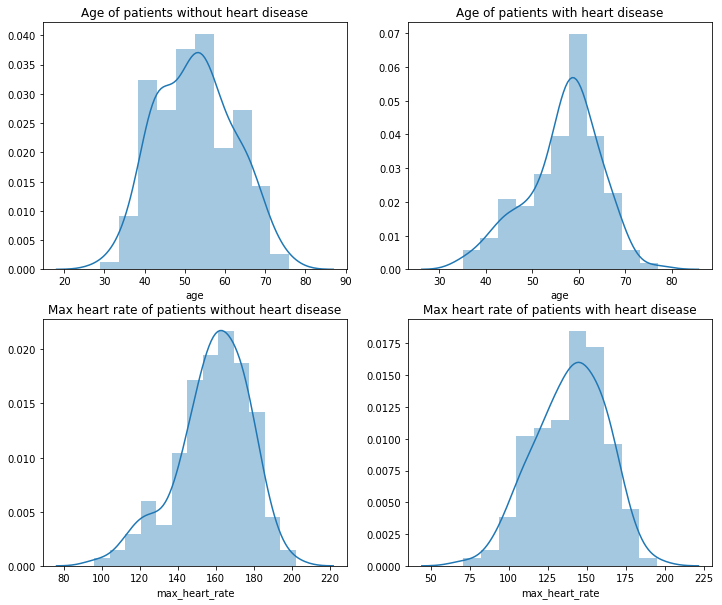

In [33]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

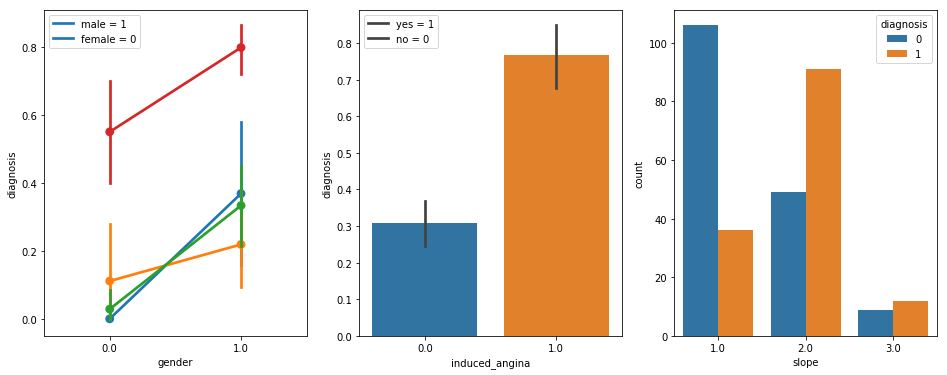

In [34]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="gender", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()

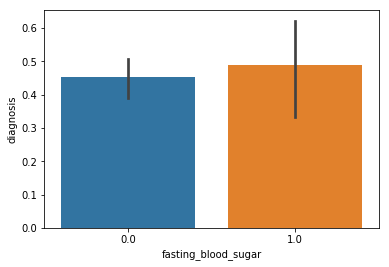

In [35]:
warnings.filterwarnings('ignore')
sns.barplot(x="fasting_blood_sugar", y="diagnosis", data=df)

# 4. Check for null values:

In [36]:
df.isnull().sum()

age                     0
gender                  0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

### Replace the null values in a column with the mode of the column

In [37]:
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [38]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


# 5. Make the train and test splits of the database:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


# 6. Model Training: MODEL 1
#### Fit the DecisionTreeClassifier to our data

In [78]:
clf_entropy=DecisionTreeClassifier(criterion = "entropy", random_state =0,max_depth=5,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Predict the diagnosis values of test data with the help of our model

In [79]:
y_pred_en=clf_entropy.predict(X_test)

In [80]:
print(y_pred_en)

[0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0]


### Check how accurately our model is predicting

In [81]:
print("Accuracy is",accuracy_score(y_test,y_pred_en)*100)
print('\n')
cm=confusion_matrix(y_test,y_pred_en)
print("confusion matrix is:")
print(cm)

Accuracy is 81.31868131868131


confusion matrix is:
[[41  3]
 [14 33]]


The above confusion matrix shows that our classification model has predicted 17 values incorrectly

# 7. Visualize the tree

In [82]:
visualize_tree(clf_entropy, df.loc[:,'age':'thal'].columns)

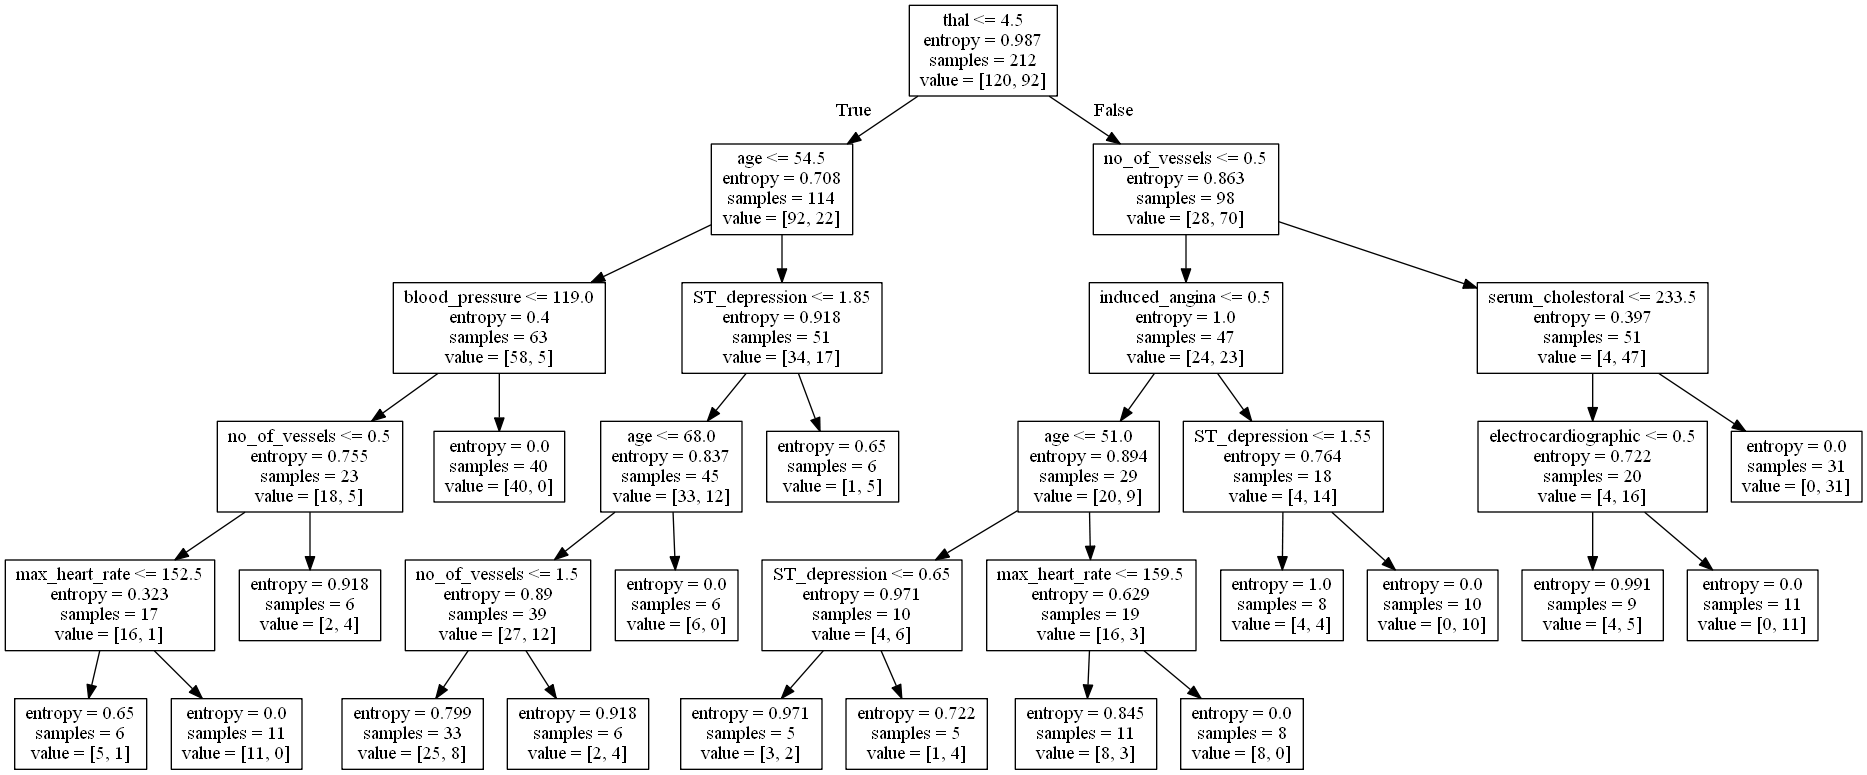

In [83]:
from IPython.display import Image  
import pydotplus 
dot_data = tree.export_graphviz(clf_entropy)
graph = pydotplus.graphviz.graph_from_dot_file("dt.dot")
graph.write_pdf("dt.pdf")
Image(graph.create_png())

In [84]:
w = clf_entropy.feature_importances_

prob_df = pd.DataFrame(columns = ['X_k', 'P(X_k)'])
for c in range(len(df.loc[:,'age':'thal'].columns)):
    prob_df.loc[len(prob_df)] = [df.loc[:,'age':'thal'].columns[c], w[c]]
    
prob_df

,X_k,P(X_k)
0,age,0.122153
1,gender,0.000000
2,chest_pain,0.000000
3,blood_pressure,0.060427
4,serum_cholestoral,0.044722
5,fasting_blood_sugar,0.000000
6,electrocardiographic,0.042632
7,max_heart_rate,0.032781
8,induced_angina,0.056510
9,ST_depression,0.094898


In [85]:
print ("Sum of dependent probabilities = " , prob_df["P(X_k)"].sum())

Sum of dependent probabilities =  1.0


# 8. Make Predictions on new data
#### Predicting new values with our model

In [86]:
xnew=[[63,1,4,120,229,0,2,129,1,2.6,2,2,7]]
ynew=clf_entropy.predict(xnew)

##### ynew=1 indicates that the person may get heart attack
##### ynew=0 indicates that the person will not get heart attack

In [87]:
if(ynew==0):
    print("Output: The person will not get heartattack")
else:
    print("Output: The person will get heartattack")    

Output: The person will get heartattack


# MODEL 2: 
### Fit the data with Random Forest classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Check the accuracy of the model and build the confusion matrix

In [89]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print('\n')
cm=confusion_matrix(y_test,predictions)
print("confusion matrix is:")
print(cm)

0.8131868131868132


confusion matrix is:
[[40  4]
 [13 34]]


#### Predict new data with random forest classifier model

In [90]:
xnew=[[64,0,3,128,239,1,2,129,1,3.4,2,2,8]]
ynew=clf.predict(xnew)

In [91]:
if(ynew==0):
    print("Output: The person will not get heartattack")
else:
    print("Output: The person will get heartattack")

Output: The person will get heartattack
